In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)
print("Matplotlib version:",matplotlib.__version__)
print("sklearn version:",sklearn.__version__)
print("Seaborn version:",sns.__version__)

Pandas version: 1.4.2
Numpy version: 1.21.5
Matplotlib version: 3.5.1
sklearn version: 1.0.2
Seaborn version: 0.11.2


In [3]:
data = pd.read_csv('student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.shape

(25, 2)

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
corr = data.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


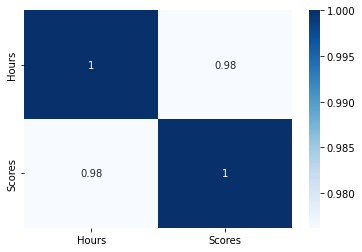

In [10]:
sns.heatmap(corr, cmap='Blues',annot=True, fmt='.2g')
plt.show()

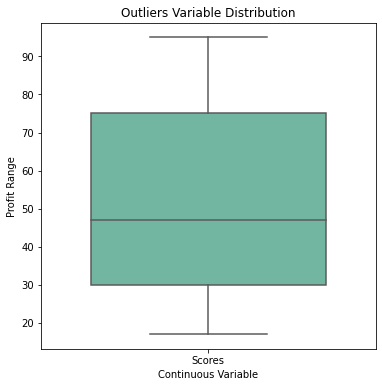

In [11]:
outliers = ['Scores']
plt.rcParams['figure.figsize'] = [6,6]
sns.boxplot(data=data[outliers], orient='v', palette='Set2', width=0.7)
plt.title('Outliers Variable Distribution')
plt.ylabel('Profit Range')
plt.xlabel('Continuous Variable')
plt.show()

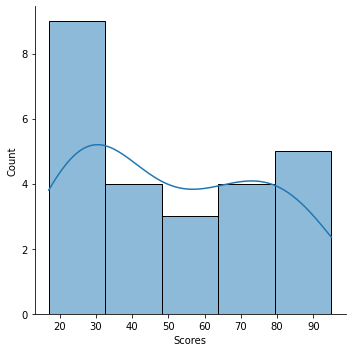

In [12]:
sns.displot(data['Scores'], bins=5, kde=True)
plt.show()

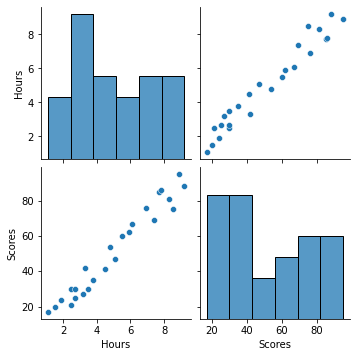

In [13]:
sns.pairplot(data)

In [14]:
X = data['Hours'].values.reshape(-1,1)
y = data['Scores'].values.reshape(-1,1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20, 1), (5, 1), (20, 1), (5, 1))

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [17]:
line = lr.coef_ * X + lr.intercept_

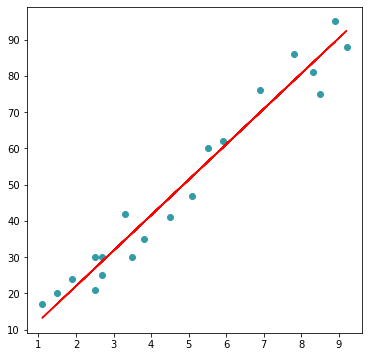

In [18]:
plt.scatter(X_train , y_train , color = "#329ba8")
plt.plot(X , line , color = "r")
plt.show()

In [19]:
y_pred = lr.predict(X_test)
y_pred

array([[74.8246185 ],
       [62.11607409],
       [33.76624426],
       [77.75735951],
       [49.40752968]])

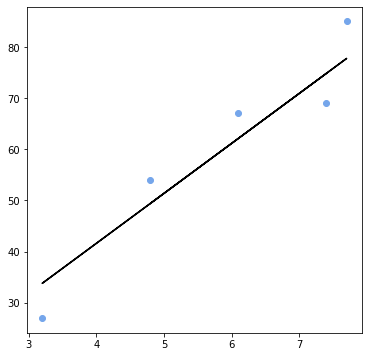

In [20]:
plt.scatter(X_test,y_test , color = "#75a6eb")
plt.plot(X_test,y_pred , color = "black")
plt.show()